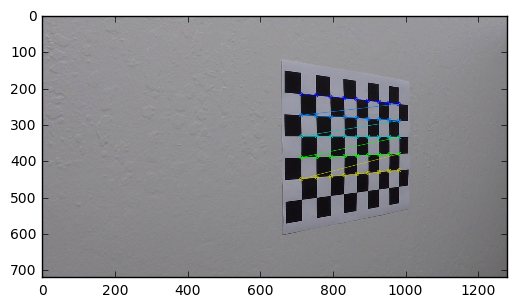

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

%matplotlib inline

nx = 9 #number of inside corners in x
ny = 5 #number of inside corners in y

path="./camera_cal/calibration*.jpg"
images = glob.glob(path)

objpoints = []
imgpoints = []

for img_path in images:
    img = mpimg.imread(img_path)
    
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        plt.imshow(img)

        objpoints.append(objp)
        imgpoints.append(corners)
    

In [2]:
img_size = (img.shape[1], img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

In [5]:
import cv2
img = cv2.imread("./camera_cal/calibration3.jpg")
udimg = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite("./output_images/calibration3.jpg", udimg)

True

In [6]:
import pickle

dist_pickle = {}
dist_pickle["mtx"]=mtx
dist_pickle["dist"]=dist
pickle.dump(dist_pickle, open("./calib.p", "wb"))